# Training a model on IAM Words Corpus

In [1]:
from lib.data_generators import WordsDatasetIterator
from lib.models import WordModel
from os import path
import numpy as np
import json
from datetime import datetime
    


images_path = path.join('..', 'data', 'iam-database', 'train_words_images.npz')
words_path = path.join('..', 'data', 'iam-database', 'train_words_text.json')
images = np.load(images_path)['arr_0']
words = json.load(open(words_path))
batch_size = 50
pool_size = 2
words_data = WordsDatasetIterator(images, words, batch_size=batch_size)

        
model = WordModel(pool_size=pool_size, vocabulary_size=words_data.get_vocabulary_size()+1)

Using TensorFlow backend.


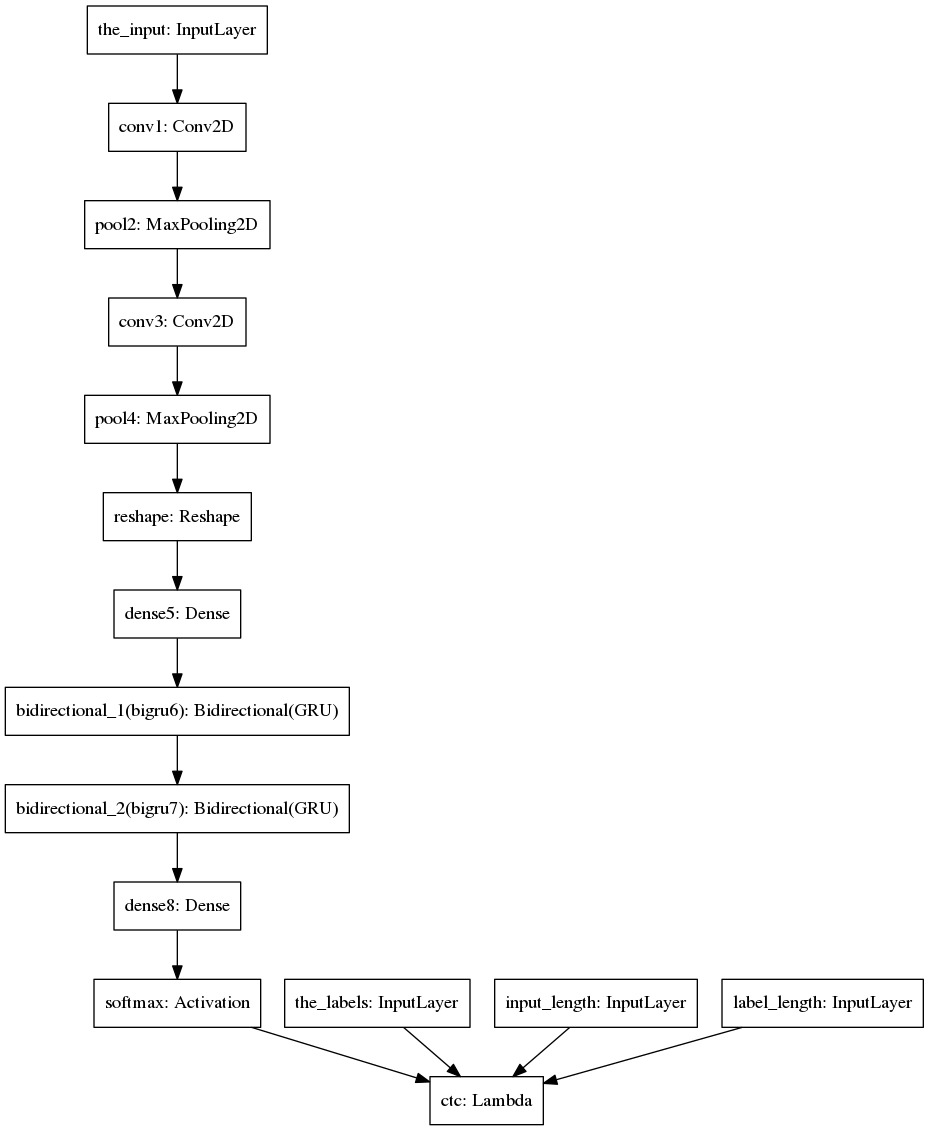

In [5]:
from IPython.display import Image
from keras.utils.vis_utils import model_to_dot

Image(model_to_dot(model.get_keras_model()).create(prog='dot', format='png'))

In [3]:
model.get_keras_model().summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
the_input (InputLayer)           (None, 200, 100, 1)   0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 200, 100, 15)  150         the_input[0][0]                  
____________________________________________________________________________________________________
pool2 (MaxPooling2D)             (None, 100, 50, 15)   0           conv1[0][0]                      
____________________________________________________________________________________________________
conv3 (Conv2D)                   (None, 100, 50, 15)   2040        pool2[0][0]                      
___________________________________________________________________________________________

In [ ]:
model.fit_generator(words_data, steps_per_epoch=92250 // batch_size)
save_path = path.join('..', 'models', 'model', 'word_model_%s.h5' % str(datetime.now()))
model.save(save_path)